# Import Data From dataset



## Configuring the package import

In [15]:
import sys
sys.path.append("..")  # Add parent directory to path


In [16]:

from datasets import load_dataset, validate_dataset, show_datasets  # Now you can import the package


ds = load_dataset("./../data/categorized_v4_numeric.csv")
ds = validate_dataset(ds)

ds.head()


,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


## Removing unnecessary columns

In [22]:
ds = ds.drop(columns=["country"])

# Drop rows with missing values
df = ds.dropna()

ds.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,gender,age,religion,married,familysize,major_category,depression_score,anxiety_score,stress_score,das_score
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,2,16,12,1,2,0,41,48,54,86
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,2,16,7,1,4,0,38,31,41,66
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,2,17,4,1,3,0,53,26,31,66
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,2,13,4,1,5,6,30,31,30,55
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,2,19,10,1,4,8,46,54,43,86


# Training Model


## Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# Define targets
target_columns = ["anxiety_score", "depression_score", "das_score", "stress_score"]

# Separate features and targets
X = df.drop(columns=target_columns)
y = df[target_columns]

# Option 1: Keep only numeric features
# X = X.select_dtypes(include=["number"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


X_test.head()
# y.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,TIPI9,TIPI10,education,urban,gender,age,religion,married,familysize,major_category
21513,3,4447,2,4928,1,3848,1,3962,2,3691,...,2,5,3,2,2,19,10,1,3,8
1796,2,40037,3,5262,2,10343,1,4624,3,6223,...,3,2,4,2,1,24,1,1,2,0
21861,2,5901,4,14174,2,10254,1,4115,1,8455,...,6,5,2,3,2,19,10,1,2,0
26571,3,5568,3,11086,3,6199,4,5730,4,23855,...,1,7,4,3,2,23,10,1,11,3
28720,1,3259,1,2679,1,2641,1,2258,2,2652,...,6,6,3,1,2,25,10,1,3,8


In [51]:
# Train the model (no need for MultiOutputClassifier)
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
# target_names = ["depression_score", "anxiety_score", "stress_score", "das_score"]
target_names = ["depression_score", "anxiety_score", "stress_score", "das_score"]





### Actual vs Predicted values check
The accuracy or R2 score is too good to be true. Therefore, I am now trying compare the values manually.

In [50]:
import pandas as pd

y_pred = pd.DataFrame(y_pred, columns=target_names)
# Compare y_pred and y_test for each column separately
for column in target_columns:
    comparison = pd.DataFrame({
        "Actual": y_test[column].reset_index(drop=True),
        "Predicted": y_pred[column]
    })
    print(f"Comparison for {column}:")
    print(comparison.head())
    print("\n")


KeyError: 'anxiety_score'

In [ ]:
for i, target in enumerate(target_names):
    print(f"\nResults for {target}:")
    print(
        f"Mean Absolute Error: {mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])}"
    )
    print(f"R² Score: {r2_score(y_test.iloc[:, i], y_pred[:, i])}")



Results for depression_score:
Mean Absolute Error: 9.744858663983537e-11
R² Score: 1.0

Results for anxiety_score:
Mean Absolute Error: 9.149546197854323e-11
R² Score: 1.0

Results for stress_score:
Mean Absolute Error: 0.2514137537506455
R² Score: 0.9997339114883765

Results for das_score:
Mean Absolute Error: 7.023743771105242e-11
R² Score: 1.0


## Graphs

### Prediction vs Actual

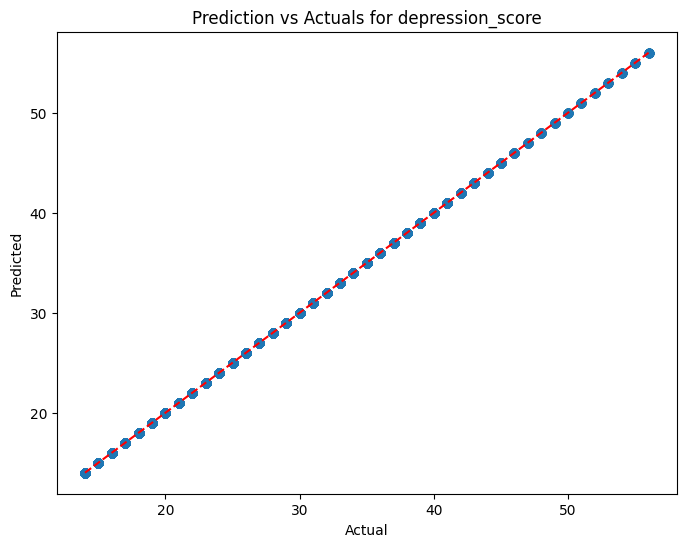

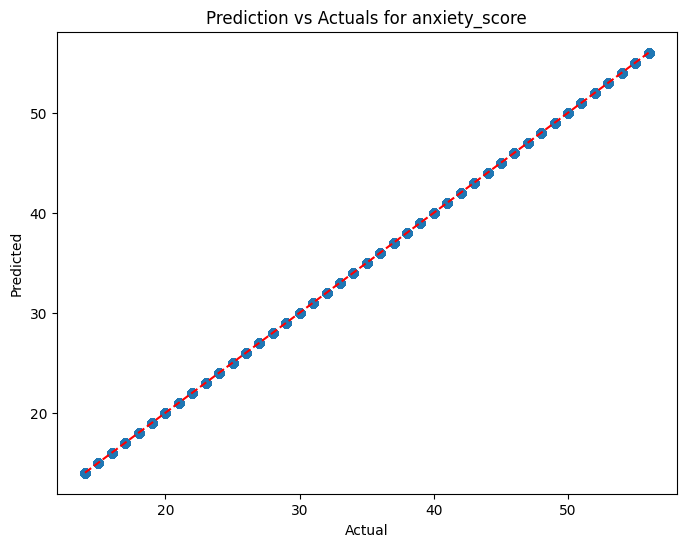

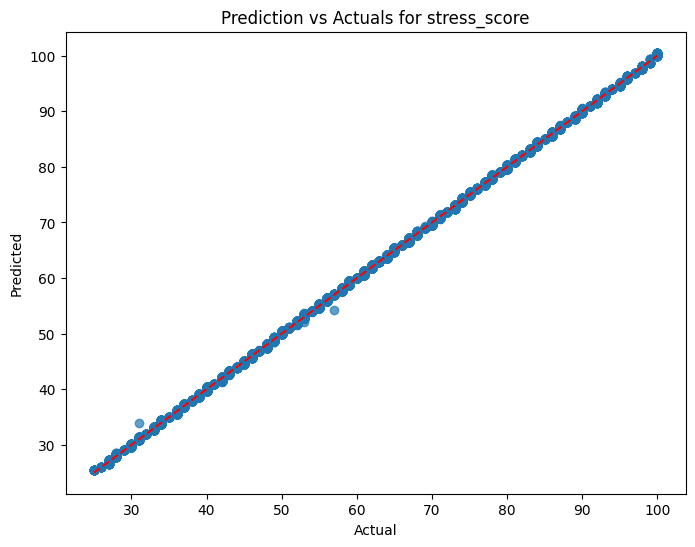

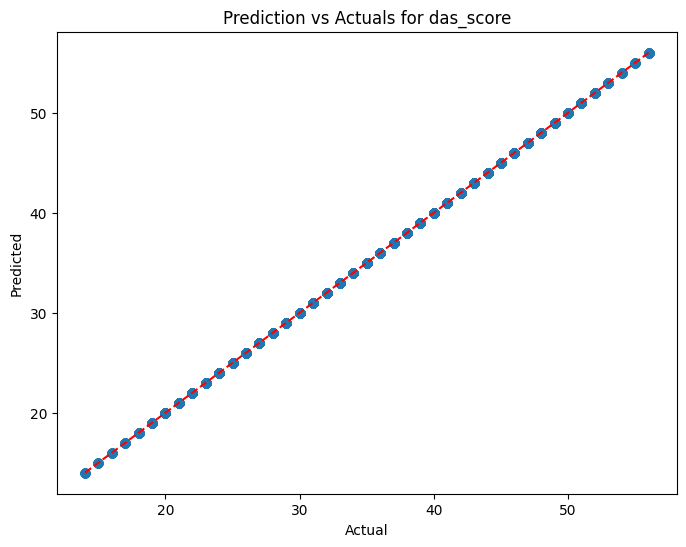

In [34]:
import matplotlib.pyplot as plt

# Plot: Prediction vs Actual
for i, target in enumerate(target_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7)
    plt.plot(
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
        color="red",
        linestyle="--",
    )  # Line of perfect prediction
    plt.title(f"Prediction vs Actuals for {target}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


### Residual Plot

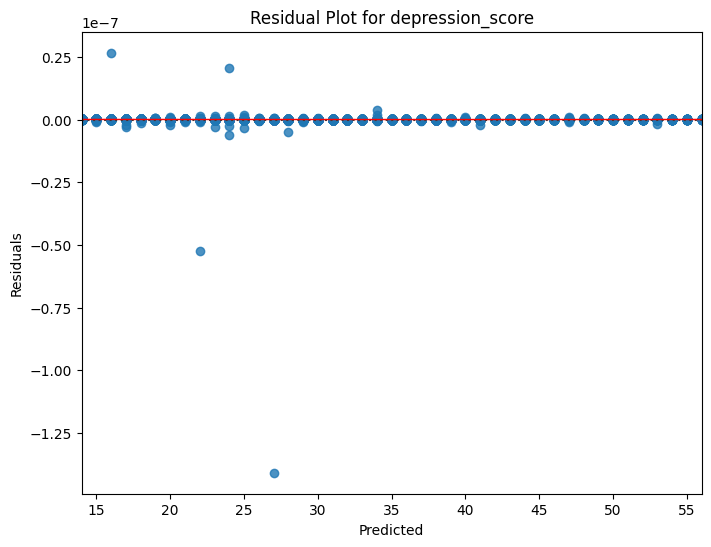

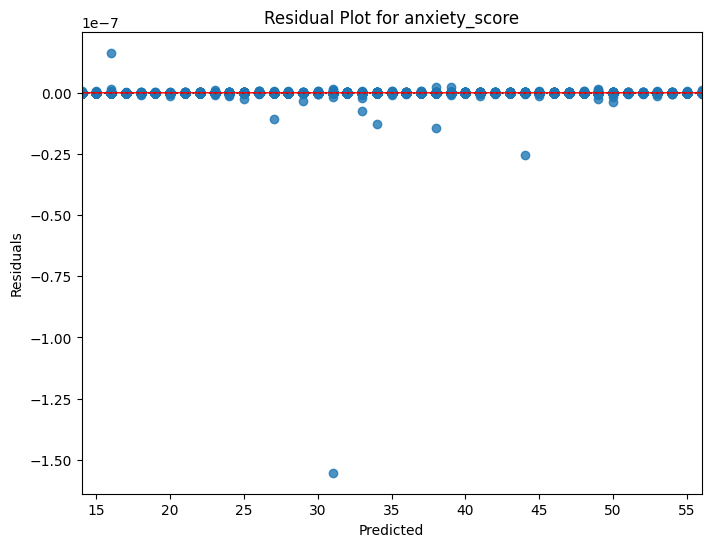

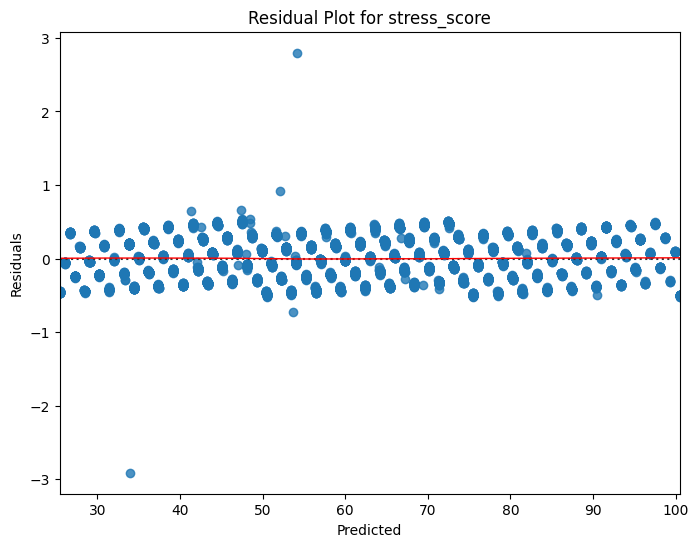

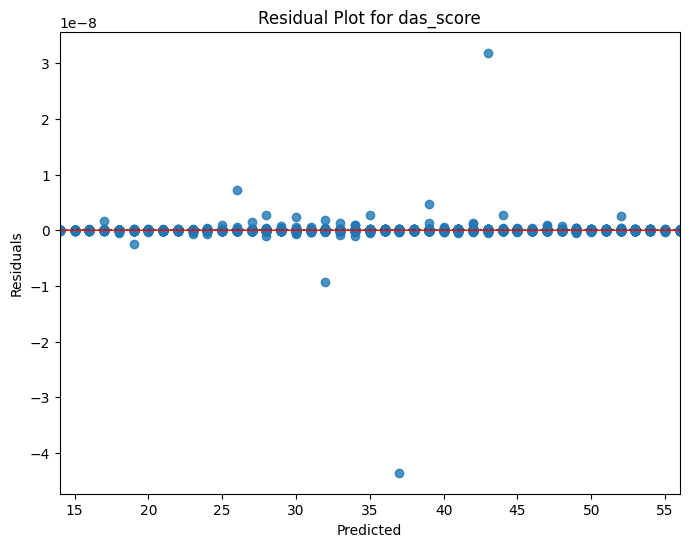

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Residual Plot
for i, target in enumerate(target_names):
    # Calculate residuals
    residuals = y_test.iloc[:, i] - y_pred[:, i]

    # Create a residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(
        x=y_pred[:, i], y=residuals, lowess=True, line_kws={"color": "red", "lw": 1}
    )
    plt.title(f"Residual Plot for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()


## Saving the model

In [36]:
import joblib
import os

# Create the models folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained model
joblib.dump(model, "models/lrv1.pkl")

# Save the feature column names used during training
joblib.dump(X.columns.tolist(), "models/lrv1_features.pkl")

print("✅ Model and features saved to the 'Models' folder.")


✅ Model and features saved to the 'Models' folder.
